# SINGLE NEURON

Learn about linear units, the building blocks of deep learning.



## Welcome to Deep Learning!
Welcome to Kaggle's Introduction to Deep Learning course! You're about to learn all you need to get started building your own deep neural networks. Using Keras and Tensorflow you'll learn how to:

create a fully-connected neural network architecture

apply neural nets to two classic ML problems: regression and classification

train neural nets with stochastic gradient descent, and

improve performance with dropout, batch normalization, and other techniques
The tutorials will introduce you to these topics with fully-worked examples, and then in the exercises, you'll explore these topics in more depth and apply them to real-world datasets.

Let's get started!

What is Deep Learning?
Some of the most impressive advances in artificial intelligence in recent years have been in the field of deep learning. Natural language translation, image recognition, and game playing are all tasks where deep learning models have neared or even exceeded human-level performance.

So what is deep learning? Deep learning is an approach to machine learning characterized by deep stacks of computations. This depth of computation is what has enabled deep learning models to disentangle the kinds of complex and hierarchical patterns found in the most challenging real-world datasets.

Through their power and scalability neural networks have become the defining model of deep learning. Neural networks are composed of neurons, where each neuron individually performs only a simple computation. The power of a neural network comes instead from the complexity of the connections these neurons can form.



## The Linear Unit
So let's begin with the fundamental component of a neural network: the individual neuron. As a diagram, a neuron (or unit) with one input looks like:
https://storage.googleapis.com/kaggle-media/learn/images/mfOlDR6.png

The input is x. Its connection to the neuron has a weight which is w. Whenever a value flows through a connection, you multiply the value by the connection's weight. For the input x, what reaches the neuron is w * x. A neural network "learns" by modifying its weights.

The b is a special kind of weight we call the bias. The bias doesn't have any input data associated with it; instead, we put a 1 in the diagram so that the value that reaches the neuron is just b (since 1 * b = b). The bias enables the neuron to modify the output independently of its inputs.

The y is the value the neuron ultimately outputs. To get the output, the neuron sums up all the values it receives through its connections. This neuron's activation is y = w * x + b, or as a formula  y=wx+b
 .



Example - The Linear Unit as a Model
Though individual neurons will usually only function as part of a larger network, it's often useful to start with a single neuron model as a baseline. Single neuron models are linear models.

Let's think about how this might work on a dataset like 80 Cereals( https://www.kaggle.com/crawford/80-cereals). Training a model with 'sugars' (grams of sugars per serving) as input and 'calories' (calories per serving) as output, we might find the bias is b=90 and the weight is w=2.5. We could estimate the calorie content of a cereal with 5 grams of sugar per serving like this: View the visual representation.

https://storage.googleapis.com/kaggle-media/learn/images/yjsfFvY.png
And, checking against our formula, we have  calories=2.5×5+90=102.5
 , just like we expect.



### Multiple Inputs
The 80 Cereals dataset has many more features than just 'sugars'. What if we wanted to expand our model to include things like fiber or protein content? That's easy enough. We can just add more input connections to the neuron, one for each additional feature. To find the output, we would multiply each input to its connection weight and then add them all together. Follow this link to better visualize how it must be done.
https://storage.googleapis.com/kaggle-media/learn/images/vyXSnlZ.png

The formula for this neuron would be  y=w0x0+w1x1+w2x2+b
 . A linear unit with two inputs will fit a plane, and a unit with more inputs than that will fit a hyperplane.





#### Linear Units in Keras
The easiest way to create a model in Keras is through keras.Sequential, which creates a neural network as a stack of layers. We can create models like those above using a dense layer (which we'll learn more about in the next lesson).

We could define a linear model accepting three input features ('sugars', 'fiber', and 'protein') and producing a single output ('calories') like so:


In [1]:
from tensorflow import keras
from tensorflow.keras import layers

#Create a network with 1 linear unit(neuron)

model = keras.Sequential([
    layers.Dense(units=1,input_shape=[3])
])


2023-08-14 16:54:52.687907: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-14 16:54:56.282701: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-14 16:54:56.289887: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-14 16:55:06.898327: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


With the first argument, units, we define how many outputs we want. In this case we are just predicting 'calories', so we'll use units=1.

With the second argument, input_shape, we tell Keras the dimensions of the inputs. Setting input_shape=[3] ensures the model will accept three features as input ('sugars', 'fiber', and 'protein').

This model is now ready to be fit to training data!



Why is input_shape a Python list?
The data we'll use in this course will be tabular data, like in a Pandas dataframe. We'll have one input for each feature in the dataset. The features are arranged by column, so we'll always have input_shape=[num_columns]. The reason Keras uses a list here is to permit use of more complex datasets. Image data, for instance, might need three dimensions: [height, width, channels].


In [2]:
pip install tensorrt

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [127 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib
      creating build/lib/tensorrt
      copying tensorrt/__init__.py -> build/lib/tensorrt
      running egg_info
      writing tensorrt.egg-info/PKG-INFO
      writing dependency_links to tensorrt.egg-info/dependency_links.txt
      writing requirements to tensorrt.egg-info/requires.txt
      writing top-level names to tensorrt.egg-info/top_level.txt
      reading manifest file 'tensorrt.egg-info/SOURCES.txt'
      adding license file 'LICENSE.txt'
      writing manifest file 'tensorrt.egg-info/SOURCES.txt'
      /usr/lib/python3/dist-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  

Failed to build tensorrt
ERROR: Could not build wheels for tensorrt, which is required to install pyproject.toml-based projects
Note: you may need to restart the kernel to use updated packages.


# MAKE YOUR MODELS DEEP

## Introduction
In this lesson we're going to see how we can build neural networks capable of learning the complex kinds of relationships deep neural nets are famous for.

The key idea here is modularity, building up a complex network from simpler functional units. We've seen how a linear unit computes a linear function -- now we'll see how to combine and modify these single units to model more complex relationships.



### LAYERS

Neural networks typically organize their neurons into layers. When we collect together linear units having a common set of inputs we get a dense layer. View this image to grasp the visual representation described above:

https://storage.googleapis.com/kaggle-media/learn/images/2MA4iMV.png
(Linear Networks with two inputs and a bias)

You could think of each layer in a neural network as performing some kind of relatively simple transformation. Through a deep stack of layers, a neural network can transform its inputs in more and more complex ways. In a well-trained neural network, each layer is a transformation getting us a little bit closer to a solution.

A "layer" in Keras is a very general kind of thing. A layer can be, essentially, any kind of data transformation. Many layers, like the convolutional and recurrent layers, transform data through use of neurons and differ primarily in the pattern of connections they form. Others though are used for feature engineering or just simple arithmetic. There's a whole world of layers to discover -- check them out!



### Activation Function

It turns out, however, that two dense layers with nothing in between are no better than a single dense layer by itself. Dense layers by themselves can never move us out of the world of lines and planes. What we need is something nonlinear. What we need are activation functions.

https://storage.googleapis.com/kaggle-media/learn/images/OLSUEYT.png

######  Without activation functions, neural networks can only learn linear relationships. In order to fit curves, we'll need to use activation functions.

An activation function is simply some function we apply to each of a layer's outputs (its activations). The most common is the rectifier function  max(0,x)
Visually represented below:
https://storage.googleapis.com/kaggle-media/learn/images/aeIyAlF.png

The rectifier function has a graph that's a line with the negative part "rectified" to zero. Applying the function to the outputs of a neuron will put a bend in the data, moving us away from simple lines.

When we attach the rectifier to a linear unit, we get a rectified linear unit or ReLU. (For this reason, it's common to call the rectifier function the "ReLU function".) Applying a ReLU activation to a linear unit means the output becomes max(0, w * x + b), which we might draw in a diagram like:

https://storage.googleapis.com/kaggle-media/learn/images/eFry7Yu.png
 .

## STACKING DENSE LAYERS

Now that we have some nonlinearity, let's see how we can stack layers to get complex data transformations.
It is represented in the image below:
https://storage.googleapis.com/kaggle-media/learn/images/Y5iwFQZ.png
(A stack of dense layers make a "fully connected neural network)

### Building Sequential Models

The Sequential model we've been using will connect together a list of layers in order from first to last: the first layer gets the input, the last layer produces the output. This creates the model in the figure above:

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    #hidden 'relu' layers
    layers.Dense(units=4, activation='relu',input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    #linear unit
    layers.Dense(units=1),
])

In [4]:
#Another way to write activation functions
model = keras.Sequential([
    layers.Dense(units=32, input_shape=[8]),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.Activation('relu'),
    layers.Dense(1),
])

# STOCHASTIC GRADIENT DESCENT

#### Introduction¶
In the first two lessons, we learned how to build fully-connected networks out of stacks of dense layers. When first created, all of the network's weights are set randomly -- the network doesn't "know" anything yet. In this lesson we're going to see how to train a neural network; we're going to see how neural networks learn.

As with all machine learning tasks, we begin with a set of training data. Each example in the training data consists of some features (the inputs) together with an expected target (the output). Training the network means adjusting its weights in such a way that it can transform the features into the target. In the 80 Cereals dataset, for instance, we want a network that can take each cereal's 'sugar', 'fiber', and 'protein' content and produce a prediction for that cereal's 'calories'. If we can successfully train a network to do that, its weights must represent in some way the relationship between those features and that target as expressed in the training data.

In addition to the training data, we need two more things:

#### A "loss function" that measures how good the network's predictions are.
##### An "optimizer" that can tell the network how to change its weights.




#####  The Loss Function
We've seen how to design an architecture for a network, but we haven't seen how to tell a network what problem to solve. This is the job of the loss function.

The loss function measures the disparity between the the target's true value and the value the model predicts.

Different problems call for different loss functions. We have been looking at regression problems, where the task is to predict some numerical value -- calories in 80 Cereals, rating in Red Wine Quality. Other regression tasks might be predicting the price of a house or the fuel efficiency of a car.

A common loss function for regression problems is the mean absolute error or MAE. For each prediction y_pred, MAE measures the disparity from the true target y_true by an absolute difference abs(y_true - y_pred).

The total MAE loss on a dataset is the mean of all these absolute differences.

https://storage.googleapis.com/kaggle-media/learn/images/VDcvkZN.png
The mean absolute error is the average length between the fitted curve and the data points.)

Besides MAE, other loss functions you might see for regression problems are the mean-squared error (MSE) or the Huber loss (both available in Keras).

During training, the model will use the loss function as a guide for finding the correct values of its weights (lower loss is better). In other words, the loss function tells the network its objective.



The Optimizer - Stochastic Gradient Descent
We've described the problem we want the network to solve, but now we need to say how to solve it. This is the job of the optimizer. The optimizer is an algorithm that adjusts the weights to minimize the loss.

Virtually all of the optimization algorithms used in deep learning belong to a family called stochastic gradient descent. They are iterative algorithms that train a network in steps. One step of training goes like this:

Sample some training data and run it through the network to make predictions.

Measure the loss between the predictions and the true values.

Finally, adjust the weights in a direction that makes the loss smaller.

Then just do this over and over until the loss is as small as you like (or until it won't decrease any further.)
View a video of how the stochastic gradient descent works.

(https://storage.googleapis.com/kaggle-media/learn/images/rFI1tIk.gif)


Each iteration's sample of training data is called a minibatch (or often just "batch"), while a complete round of the training data is called an epoch. The number of epochs you train for is how many times the network will see each training example.

The animation shows the linear model from Lesson 1 being trained with SGD. The pale red dots depict the entire training set, while the solid red dots are the minibatches. Every time SGD sees a new minibatch, it will shift the weights (w the slope and b the y-intercept) toward their correct values on that batch. Batch after batch, the line eventually converges to its best fit. You can see that the loss gets smaller as the weights get closer to their true values.

### Learning Rate and Batch Size
Notice that the line only makes a small shift in the direction of each batch (instead of moving all the way). The size of these shifts is determined by the learning rate. A smaller learning rate means the network needs to see more minibatches before its weights converge to their best values.

The learning rate and the size of the minibatches are the two parameters that have the largest effect on how the SGD training proceeds. Their interaction is often subtle and the right choice for these parameters isn't always obvious. (We'll explore these effects in the exercise.)

Fortunately, for most work it won't be necessary to do an extensive hyperparameter search to get satisfactory results. Adam is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). ADAM is a great general-purpose optimizer.



#### Adding the Loss and Optimizer
After defining a model, you can add a loss function and optimizer with the model's compile method:



In [5]:
model.compile(
optimizer='adam',loss="mae")

Notice that we are able to specify the loss and optimizer with just a string. You can also access these directly through the Keras API -- if you wanted to tune parameters, for instance -- but for us, the defaults will work fine.
Notice that we are able to specify the loss and optimizer with just a string. You can also access these directly through the Keras API -- if you wanted to tune parameters, for instance -- but for us, the defaults will work fine.





#### What's In a Name?
The gradient is a vector that tells us in what direction the weights need to go. More precisely, it tells us how to change the weights to make the loss change fastest. We call our process gradient descent because it uses the gradient to descend the loss curve towards a minimum. Stochastic means "determined by chance." Our training is stochastic because the minibatches are random samples from the dataset. And that's why it's called SGD

### Example - Red Wine Quality
Now we know everything we need to start training deep learning models. So let's see it in action! We'll use the Red Wine Quality dataset.

This dataset consists of physiochemical measurements from about 1600 Portuguese red wines. Also included is a quality rating for each wine from blind taste-tests. How well can we predict a wine's perceived quality from these measurements?

We've put all of the data preparation into this next hidden cell. It's not essential to what follows so feel free to skip it. One thing you might note for now though is that we've rescaled each feature to lie in the interval  [0,1]
 . As we'll discuss more in Lesson 5, neural networks tend to perform best when their inputs are on a common scale.

In [6]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv("./red-wine.csv")

#Create Training and validation 
df_train = red_wine.sample(frac=0.7,random_state=0)
df_valid = red_wine.drop(df_train.index)

display(df_train.head(4))

#Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train  = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [7]:
print(X_train.shape)

(1119, 11)


How many inputs should this network have? We can discover this by looking at the number of columns in the data matrix. Be sure not to include the target ('quality') here -- only the input features.
Eleven columns means eleven inputs.

We've chosen a three-layer network with over 1500 neurons. This network should be capable of learning fairly complex relationships in the data

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512,activation='relu'),
    layers.Dense(1),
])

Deciding the architecture of your model should be part of a process. Start simple and use the validation loss as your guide. You'll learn more about model development in the exercises.

After defining the model, we compile in the optimizer and loss function.

In [9]:
model.compile(
optimizer='adam',
loss='mae')

Now we're ready to start the training! We've told Keras to feed the optimizer 256 rows of the training data at a time (the batch_size) and to do that 10 times all the way through the dataset (the epochs).

In [11]:
history = model.fit(
X_train, y_train, validation_data=(X_valid,y_valid),
batch_size=256,
epochs=10,
)

Epoch 1/10
5/5 [==============================] - 20s 125ms/step - loss: 0.2766 - val_loss: 0.1346
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 0.1422 - val_loss: 0.1220
Epoch 3/10
5/5 [==============================] - 0s 23ms/step - loss: 0.1236 - val_loss: 0.1181
Epoch 4/10
5/5 [==============================] - 0s 21ms/step - loss: 0.1167 - val_loss: 0.1082
Epoch 5/10
5/5 [==============================] - 0s 18ms/step - loss: 0.1110 - val_loss: 0.1091
Epoch 6/10
5/5 [==============================] - 0s 22ms/step - loss: 0.1075 - val_loss: 0.1034
Epoch 7/10
5/5 [==============================] - 0s 20ms/step - loss: 0.1047 - val_loss: 0.1062
Epoch 8/10
5/5 [==============================] - 0s 17ms/step - loss: 0.1034 - val_loss: 0.1022
Epoch 9/10
5/5 [==============================] - 0s 18ms/step - loss: 0.1026 - val_loss: 0.1008
Epoch 10/10
5/5 [==============================] - 0s 22ms/step - loss: 0.1007 - val_loss: 0.1019


You can see that Keras will keep you updated on the loss as the model trains.

Often, a better way to view the loss though is to plot it. The fit method in fact keeps a record of the loss produced during training in a History object. We'll convert the data to a Pandas dataframe, which makes the plotting easy.

<AxesSubplot:>

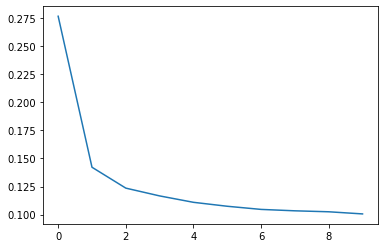

In [13]:
import pandas as pd

# convert the training history to dataframe
history_df = pd.DataFrame(history.history)
# use pandas to native plot method
history_df['loss'].plot()